In [1]:
#Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
file = "Resources/car_insurance_claim.csv"
claim_data = pd.read_csv(file)
claim_data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [3]:
claim_data.count()

ID            10302
KIDSDRIV      10302
BIRTH         10302
AGE           10295
HOMEKIDS      10302
YOJ            9754
INCOME         9732
PARENT1       10302
HOME_VAL       9727
MSTATUS       10302
GENDER        10302
EDUCATION     10302
OCCUPATION     9637
TRAVTIME      10302
CAR_USE       10302
BLUEBOOK      10302
TIF           10302
CAR_TYPE      10302
RED_CAR       10302
OLDCLAIM      10302
CLM_FREQ      10302
REVOKED       10302
MVR_PTS       10302
CLM_AMT       10302
CAR_AGE        9663
CLAIM_FLAG    10302
URBANICITY    10302
dtype: int64

In [4]:
#drop rows with missing information & data 
claim_data = claim_data.dropna(how='any')
claim_data.count()

ID            7657
KIDSDRIV      7657
BIRTH         7657
AGE           7657
HOMEKIDS      7657
YOJ           7657
INCOME        7657
PARENT1       7657
HOME_VAL      7657
MSTATUS       7657
GENDER        7657
EDUCATION     7657
OCCUPATION    7657
TRAVTIME      7657
CAR_USE       7657
BLUEBOOK      7657
TIF           7657
CAR_TYPE      7657
RED_CAR       7657
OLDCLAIM      7657
CLM_FREQ      7657
REVOKED       7657
MVR_PTS       7657
CLM_AMT       7657
CAR_AGE       7657
CLAIM_FLAG    7657
URBANICITY    7657
dtype: int64

In [5]:
#claim_data[['TRAVTIME']].head()

In [6]:
# CLEANING DATA

# 1. get rid of '$' & ',' and convertcolumns values to numeric in 
    
# CLM_AMT
claim_data['CLM_AMT'] = claim_data['CLM_AMT'].str.replace('$','').str.replace(',','')
claim_data['CLM_AMT'] = pd.to_numeric(claim_data['CLM_AMT'])
# OLDCLAIM
claim_data['OLDCLAIM'] = claim_data['OLDCLAIM'].str.replace('$','').str.replace(',','')
claim_data['OLDCLAIM'] = pd.to_numeric(claim_data['OLDCLAIM'])
#INCOME
claim_data['INCOME'] = claim_data['INCOME'].str.replace('$','').str.replace(',','')
claim_data['INCOME'] = pd.to_numeric(claim_data['INCOME'])
#HOME_VAL
claim_data['HOME_VAL'] = claim_data['HOME_VAL'].str.replace('$','').str.replace(',','')
claim_data['HOME_VAL'] = pd.to_numeric(claim_data['HOME_VAL'])


# EDUCATION
claim_data['EDUCATION'] = claim_data['EDUCATION'].str.replace('z_','').str.replace(',','')
claim_data['EDUCATION'] = claim_data['EDUCATION'].str.replace('<','').str.replace(',','')
# GENDER
claim_data['GENDER'] = claim_data['GENDER'].str.replace('z_','').str.replace(',','')
# OCCUPATION
claim_data['OCCUPATION'] = claim_data['OCCUPATION'].str.replace('z_','').str.replace(',','')
#CAR_TYPE
claim_data['CAR_TYPE'] = claim_data['CAR_TYPE'].str.replace('z_','').str.replace(',','')
#URBANICITY
claim_data['URBANICITY'] =claim_data['URBANICITY'].str.replace('z_','').str.replace(',','')




# 2. convert float data to integers in AGE, CAR_AGE, and TRAVTIME 

pd.options.display.float_format = '{:,.0f}'.format
#claim_data.round(0).astype(int)

In [7]:
claim_data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60,0,11,67349,No,0,z_No,...,Minivan,yes,4461,2,No,3,0,18,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43,0,11,91449,No,257252,z_No,...,Minivan,yes,0,0,No,0,0,1,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48,0,11,52881,No,0,z_No,...,Van,yes,0,0,No,2,0,10,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35,1,10,16039,No,124191,Yes,...,SUV,no,38690,2,No,3,0,10,0,Highly Urban/ Urban
6,871024631,0,05MAY65,34,1,12,125301,Yes,0,z_No,...,Sports Car,no,0,0,No,0,2946,7,1,Highly Urban/ Urban


In [8]:
claim_data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [9]:
# Assumption: drop unnecessary variables 

claim_data.drop(columns=['BIRTH','REVOKED','BLUEBOOK','TIF','MVR_PTS', 'PARENT1','CLAIM_FLAG','MSTATUS','HOMEKIDS',
                         'PARENT1','YOJ'], inplace=True)
claim_data.head()

,ID,KIDSDRIV,AGE,INCOME,HOME_VAL,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE,URBANICITY
0,63581743,0,60,67349,0,M,PhD,Professional,14,Private,Minivan,yes,4461,2,0,18,Highly Urban/ Urban
1,132761049,0,43,91449,257252,M,High School,Blue Collar,22,Commercial,Minivan,yes,0,0,0,1,Highly Urban/ Urban
2,921317019,0,48,52881,0,M,Bachelors,Manager,26,Private,Van,yes,0,0,0,10,Highly Urban/ Urban
3,727598473,0,35,16039,124191,F,High School,Clerical,5,Private,SUV,no,38690,2,0,10,Highly Urban/ Urban
6,871024631,0,34,125301,0,F,Bachelors,Blue Collar,46,Commercial,Sports Car,no,0,0,2946,7,Highly Urban/ Urban


In [10]:
# group data by KIDSDRIV colomn 
claim_kids_drive = claim_data.groupby(['KIDSDRIV'],as_index=False)

# Calculate claim averages using the .mean() method
claim_kids = claim_kids_drive.mean()
claim_kids

#claim_kids=[['KIDSDRIV','OLDCLAIM','CLM_AMT']]


,KIDSDRIV,ID,AGE,INCOME,HOME_VAL,TRAVTIME,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE
0,0,"497,185,381",45,"58,457","150,553",34,"3,932",1,"1,391",8
1,1,"506,878,766",43,"53,349","145,064",34,"4,970",1,"2,154",7
2,2,"494,532,440",43,"54,709","149,941",34,"4,063",1,"1,956",7
3,3,"517,851,167",43,"51,607","142,389",34,"4,837",1,"2,640",7
4,4,"480,618,672",64,"63,900","230,188",55,"12,196",0,0,4


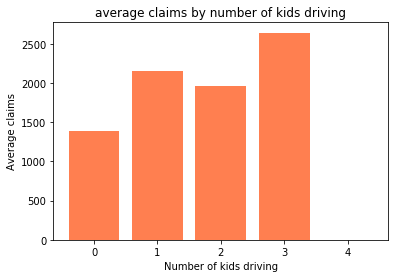

In [11]:
# average claims by number of kids driving 

x = claim_kids['KIDSDRIV']
y = claim_kids['CLM_AMT']

plt.bar(x, y, color= 'coral', alpha=1, align="center")

plt.title('average claims by number of kids driving')
plt.xlabel('Number of kids driving')
plt.ylabel('Average claims')

# Save the figure as png file
plt.savefig("Images/AVG_CLAIM_BY_KIDSDRIVE.png")


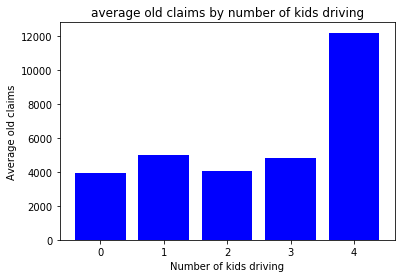

In [196]:
# average old claims by number of kids driving

y1 = claim_kids['OLDCLAIM']
plt.bar(x, y1, color= 'blue', alpha=1, align="center")
plt.title('average old claims by number of kids driving')
plt.xlabel('Number of kids driving')
plt.ylabel('Average old claims')

# Save the figure as png file
plt.savefig("Images/AVG_OLDCLAIM_BY_KIDSDRIVE.png")


In [197]:
# group data by CAR_USE colomn calculate their avrages 
claim_car = claim_data.groupby(['CAR_USE'],as_index=False)

claim_car_use= claim_car.sum()
claim_car_use


,CAR_USE,ID,KIDSDRIV,AGE,INCOME,HOME_VAL,TRAVTIME,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE
0,Commercial,1313143222959,450,"112,306",147191078,378704298,86749,11192486,2303,5401366,"17,017"
1,Private,2500226837990,868,"229,966",295929308,770247787,171052,19653340,3749,5934136,"43,419"


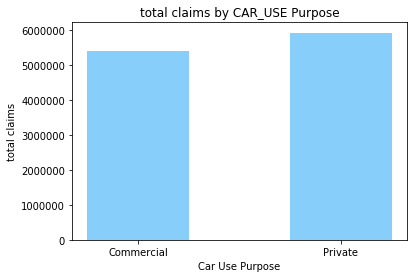

In [198]:
# total claims by CAR_USE 

x = claim_car_use['CAR_USE']
y = claim_car_use['CLM_AMT']
Y1= claim_car_use['OLDCLAIM']
plt.bar(x, y, color= 'lightskyblue', alpha=1, align="center", width=0.5)

plt.title('total claims by CAR_USE Purpose')
plt.xlabel('Car Use Purpose')
plt.ylabel('total claims')

# Save the figure as png file
plt.savefig("Images/total_claims_by_CAR_USE.png")

In [199]:
https://github.com/hmakhlouf/Unit-4-Assignment---Pandas/blob/master/PyCitySchools/PyCitySchools_starter.ipynb

SyntaxError: invalid syntax (<ipython-input-199-a4510fec1fb6>, line 1)

In [200]:
########### Pie Charts

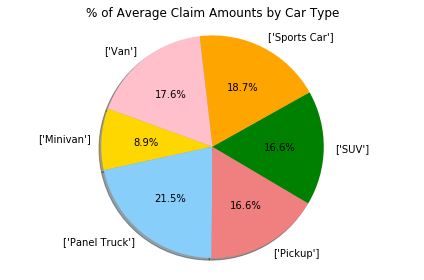

In [201]:
# Average Claim Amounts by Car Type
cars = claim_data.groupby("CAR_TYPE")["CAR_TYPE"].unique()
avg_claim = claim_data.groupby("CAR_TYPE")["CLM_AMT"].mean()


colors = ["gold", "lightskyblue", "lightcoral", "green", "orange", "pink"]
explode = (0, 0, 0, 0, 0, 0)
plt.pie(avg_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Average Claim Amounts by Car Type")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/avg_claim_type.png")
plt.show()


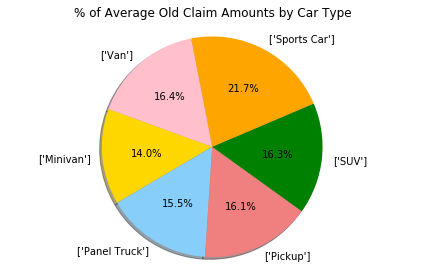

In [202]:
# Average Old Claim Amounts by Car Type
cars = claim_data.groupby("CAR_TYPE")["CAR_TYPE"].unique()
avg_old_claim = claim_data.groupby("CAR_TYPE")["OLDCLAIM"].mean()


colors = ["gold", "lightskyblue", "lightcoral", "green", "orange", "pink"]
explode = (0, 0, 0, 0, 0, 0)
plt.pie(avg_old_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Average Old Claim Amounts by Car Type")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/old_claim_type.png")
plt.show()


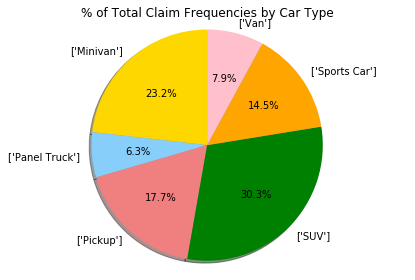

In [203]:
# Total Claim Frequencies by Car Type
cars = claim_data.groupby("CAR_TYPE")["CAR_TYPE"].unique()
total_claim = claim_data.groupby("CAR_TYPE")["CLM_FREQ"].sum()


colors = ["gold", "lightskyblue", "lightcoral", "green", "orange", "pink"]
explode = (0, 0, 0, 0, 0, 0)
plt.pie(total_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Claim Frequencies by Car Type")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/total_freq_type.png")
plt.show()


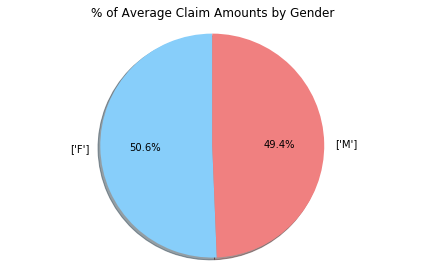

In [204]:
# Average Claim Amounts by Gender
cars = claim_data.groupby("GENDER")["GENDER"].unique()
avg_claim = claim_data.groupby("GENDER")["CLM_AMT"].mean()


colors = ["lightskyblue", "lightcoral"]
explode = (0, 0)
plt.pie(avg_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Average Claim Amounts by Gender")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/avg_claim_gender.png")
plt.show()


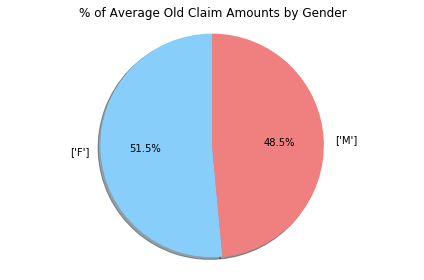

In [205]:
# Average Old Claim Amounts by Gender
cars = claim_data.groupby("GENDER")["GENDER"].unique()
avg_old_claim = claim_data.groupby("GENDER")["OLDCLAIM"].mean()


colors = ["lightskyblue", "lightcoral"]
explode = (0, 0)
plt.pie(avg_old_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Average Old Claim Amounts by Gender")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/old_claim_gender.png")
plt.show()


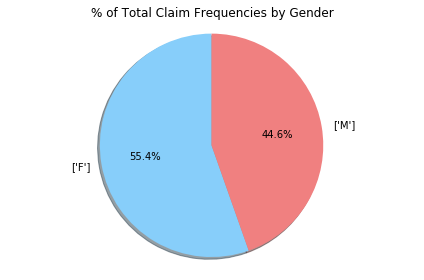

In [206]:
# Total Claim Frequencies by Gender
cars = claim_data.groupby("GENDER")["GENDER"].unique()
total_claim = claim_data.groupby("GENDER")["CLM_FREQ"].sum()


colors = ["lightskyblue", "lightcoral"]
explode = (0, 0)
plt.pie(total_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Claim Frequencies by Gender")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/total_freq_gender.png")
plt.show()


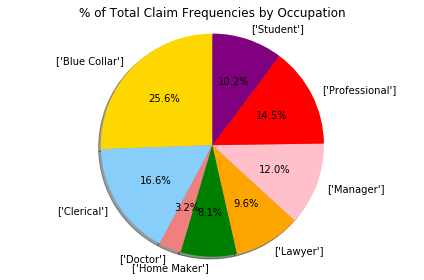

In [207]:
# Total Claim Frequencies by Occupation
cars = claim_data.groupby("OCCUPATION")["OCCUPATION"].unique()
claim_freq = claim_data.groupby("OCCUPATION")["CLM_FREQ"].sum()


colors = ["gold", "lightskyblue", "lightcoral", "green", "orange", "pink", "red", "purple"]
explode = (0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(claim_freq, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Claim Frequencies by Occupation")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/total_freq_occupation.png")
plt.show()


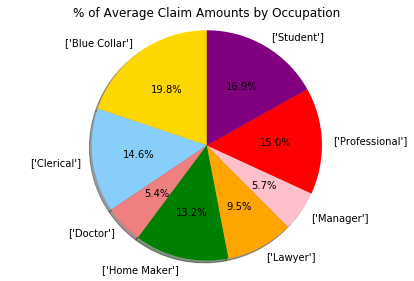

In [208]:
# Average Claim Amounts by Occupation
cars = claim_data.groupby("OCCUPATION")["OCCUPATION"].unique()
avg_claim = claim_data.groupby("OCCUPATION")["CLM_AMT"].mean()


colors = ["gold", "lightskyblue", "lightcoral", "green", "orange", "pink", "red", "purple"]
explode = (0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(avg_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Average Claim Amounts by Occupation")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/avg_claim_occupation.png")
plt.show()


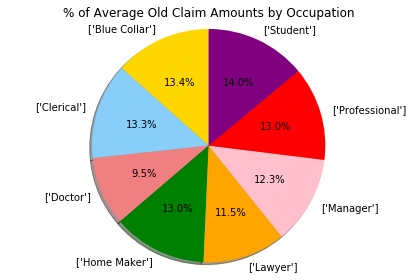

In [209]:
# Average Old Claim Amounts by Occupation
cars = claim_data.groupby("OCCUPATION")["OCCUPATION"].unique()
avg_old_claim = claim_data.groupby("OCCUPATION")["OLDCLAIM"].mean()


colors = ["gold", "lightskyblue", "lightcoral", "green", "orange", "pink", "red", "purple"]
explode = (0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(avg_old_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Average Old Claim Amounts by Occupation")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/old_claim_occupation.png")
plt.show()


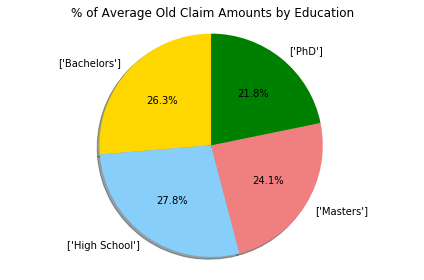

In [210]:
# Average Old Claim Amounts by Education
cars = claim_data.groupby("EDUCATION")["EDUCATION"].unique()
avg_old_claim = claim_data.groupby("EDUCATION")["OLDCLAIM"].mean()


colors = ["gold", "lightskyblue", "lightcoral", "green", "orange"]
explode = (0, 0, 0, 0)
plt.pie(avg_old_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Average Old Claim Amounts by Education")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/old_claim_edu.png")
plt.show()


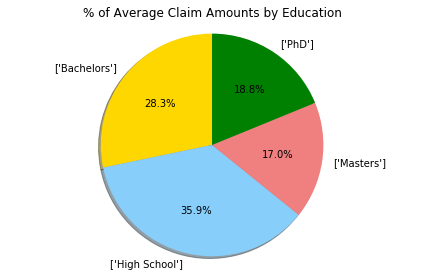

In [211]:
# Average Claim Amounts by Education
cars = claim_data.groupby("EDUCATION")["EDUCATION"].unique()
avg_old_claim = claim_data.groupby("EDUCATION")["CLM_AMT"].mean()


colors = ["gold", "lightskyblue", "lightcoral", "green", "orange"]
explode = (0, 0, 0, 0)
plt.pie(avg_old_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Average Claim Amounts by Education")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/avg_claim_edu.png")
plt.show()


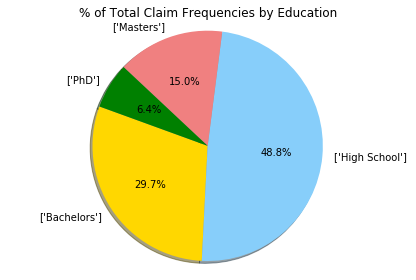

In [212]:
# Total Claim Frequencies by Education
cars = claim_data.groupby("EDUCATION")["EDUCATION"].unique()
avg_old_claim = claim_data.groupby("EDUCATION")["CLM_FREQ"].sum()


colors = ["gold", "lightskyblue", "lightcoral", "green", "orange"]
explode = (0, 0, 0, 0)
plt.pie(avg_old_claim, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Claim Frequencies by Education")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/total_freq_edu.png")
plt.show()


In [213]:
########### Bar Graphs

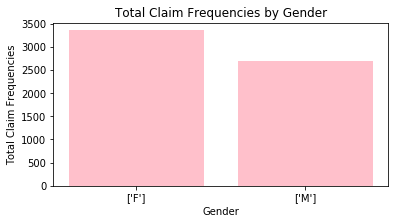

In [55]:
# Total Claim Frequencies by Gender
x1 = claim_data.groupby("GENDER")["GENDER"].unique()
y1 = claim_data.groupby("GENDER")["CLM_FREQ"].sum()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Total Claim Frequencies by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Claim Frequencies")


plt.bar(x_axis, y1, color= 'pink', alpha=1, align="center")
plt.xticks(tick_locations, x1)
plt.xticks


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 # Set figure width to 6 and height to 3
fig_size[0] = 6
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_freq_gender.png")
plt.show()


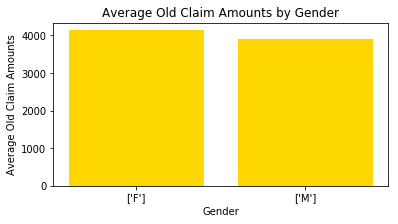

In [56]:
# Average Old Claim Amounts by Gender
x1 = claim_data.groupby("GENDER")["GENDER"].unique()
y1 = claim_data.groupby("GENDER")["OLDCLAIM"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Old Claim Amounts by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Old Claim Amounts")


plt.bar(x_axis, y1, color= 'gold', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 6 and height to 3
fig_size[0] = 6
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_old_gender.png")
plt.show()


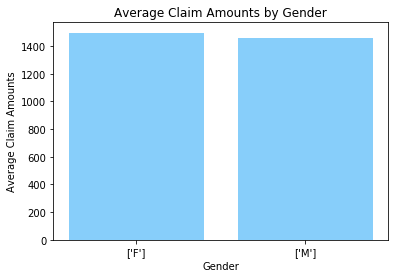

In [14]:
# Average Claim Amounts by Gender
x1 = claim_data.groupby("GENDER")["GENDER"].unique()
y1 = claim_data.groupby("GENDER")["CLM_AMT"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Amounts by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Claim Amounts")


plt.bar(x_axis, y1, color= 'lightskyblue', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Save the figure as png file
plt.savefig("Images/bar_avg_gender.png")
plt.show()


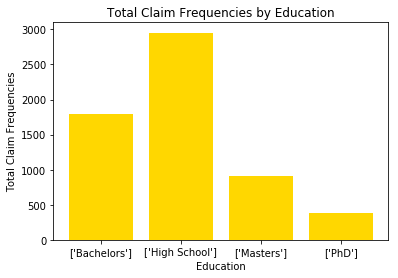

In [15]:
# Total Claim Frequencies by Education
x1 = claim_data.groupby("EDUCATION")["EDUCATION"].unique()
y1 = claim_data.groupby("EDUCATION")["CLM_FREQ"].sum()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Total Claim Frequencies by Education")
plt.xlabel("Education")
plt.ylabel("Total Claim Frequencies")


plt.bar(x_axis, y1, color= 'gold', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 6 and height to 3
fig_size[0] = 6
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_freq_edu.png")
plt.show()


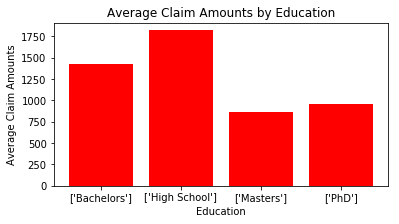

In [57]:
# Average Claim Amounts by Education
x1 = claim_data.groupby("EDUCATION")["EDUCATION"].unique()
y1 = claim_data.groupby("EDUCATION")["CLM_AMT"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Amounts by Education")
plt.xlabel("Education")
plt.ylabel("Average Claim Amounts")


plt.bar(x_axis, y1, color= 'red', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 6 and height to 3
fig_size[0] = 6
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_avg_edu.png")
plt.show()


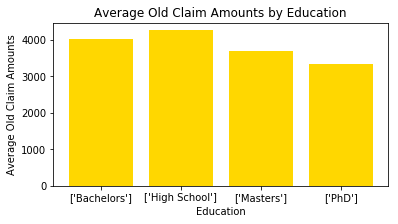

In [58]:
# Average Old Claim Amounts by Education
x1 = claim_data.groupby("EDUCATION")["EDUCATION"].unique()
y1 = claim_data.groupby("EDUCATION")["OLDCLAIM"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Old Claim Amounts by Education")
plt.xlabel("Education")
plt.ylabel("Average Old Claim Amounts")


plt.bar(x_axis, y1, color= 'gold', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 6 and height to 3
fig_size[0] = 6
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_old_edu.png")
plt.show()


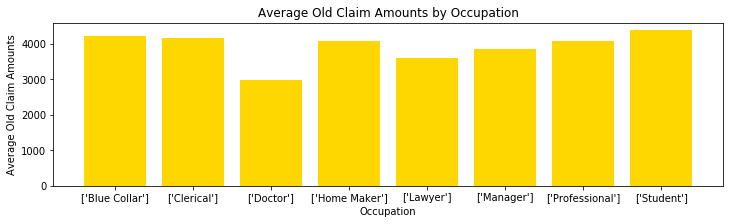

In [37]:
# Average Old Claim Amounts by Occupation
x1 = claim_data.groupby("OCCUPATION")["OCCUPATION"].unique()
y1 = claim_data.groupby("OCCUPATION")["OLDCLAIM"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Old Claim Amounts by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Old Claim Amounts")


plt.bar(x_axis, y1, color= 'gold', alpha=1, align="center",width=0.8)
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"] 
# Set figure width to 12 and height to 3
fig_size[0] = 12
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_old_occupation.png")
plt.show()


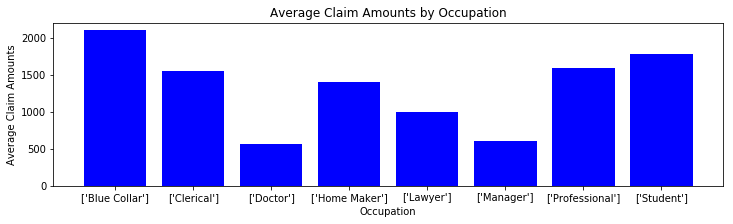

In [38]:
# Average Claim Amounts by Occupation
x1 = claim_data.groupby("OCCUPATION")["OCCUPATION"].unique()
y1 = claim_data.groupby("OCCUPATION")["CLM_AMT"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Amounts by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Claim Amounts")


plt.bar(x_axis, y1, color= 'blue', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 3
fig_size[0] = 12
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_avg_occupation.png")
plt.show()


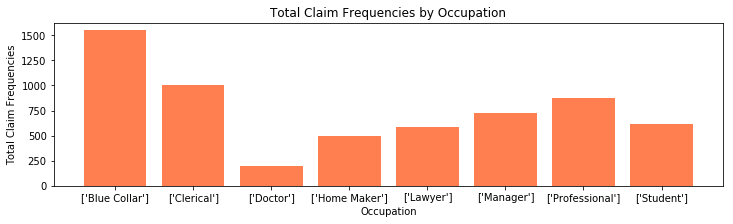

In [40]:
# Total Claim Frequencies by Occupation
x1 = claim_data.groupby("OCCUPATION")["OCCUPATION"].unique()
y1 = claim_data.groupby("OCCUPATION")["CLM_FREQ"].sum()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Total Claim Frequencies by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Claim Frequencies")


#plt.bar(x_axis, y1, color= 'coral', alpha=1, align="center")
plt.bar(x_axis, y1, color= 'coral')
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 3
fig_size[0] = 12
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_freq_occupation.png")
plt.show()


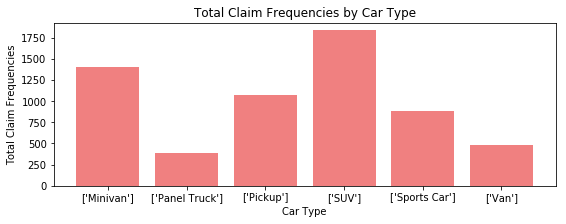

In [17]:
# Total Claim Frequencies by Car Type
x1 = claim_data.groupby("CAR_TYPE")["CAR_TYPE"].unique()
y1 = claim_data.groupby("CAR_TYPE")["CLM_FREQ"].sum()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Total Claim Frequencies by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Total Claim Frequencies")


plt.bar(x_axis, y1, color= 'lightcoral', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 8 and height to 3
fig_size[0] = 8
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_freq_type.png")
plt.show()


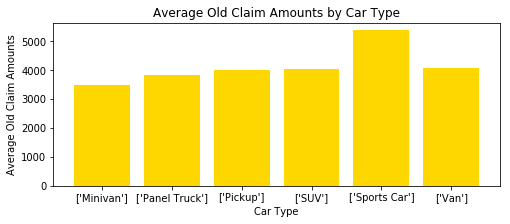

In [44]:
# Average Old Claim Amounts by Car Type
x1 = claim_data.groupby("CAR_TYPE")["CAR_TYPE"].unique()
y1 = claim_data.groupby("CAR_TYPE")["OLDCLAIM"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Old Claim Amounts by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Average Old Claim Amounts")


plt.bar(x_axis, y1, color= 'gold', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 8 and height to 3
fig_size[0] = 8
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_old_type.png")
plt.show()


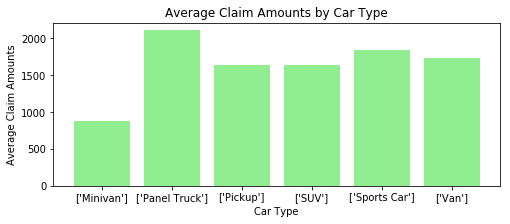

In [19]:
# Average Claim Amounts by Car Type
x1 = claim_data.groupby("CAR_TYPE")["CAR_TYPE"].unique()
y1 = claim_data.groupby("CAR_TYPE")["CLM_AMT"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Amounts by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Average Claim Amounts")


plt.bar(x_axis, y1, color= 'lightgreen', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 8 and height to 3
fig_size[0] = 8
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_avg_type.png")
plt.show()


In [226]:
########### Red Car Graphs


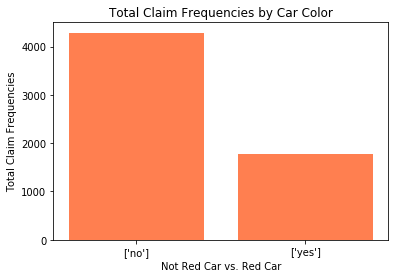

In [227]:
# Total Claim Frequencies by Car Color
x1 = claim_data.groupby("RED_CAR")["RED_CAR"].unique()
y1 = claim_data.groupby("RED_CAR")["CLM_FREQ"].sum()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Total Claim Frequencies by Car Color")
plt.xlabel("Not Red Car vs. Red Car")
plt.ylabel("Total Claim Frequencies")


plt.bar(x_axis, y1, color= 'coral', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Save the figure as png file
plt.savefig("Images/bar_freq_red.png")
plt.show()


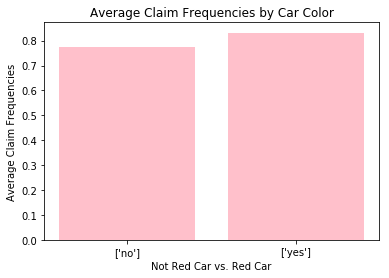

In [228]:
# Average Claim Frequencies by Car Color
x1 = claim_data.groupby("RED_CAR")["RED_CAR"].unique()
y1 = claim_data.groupby("RED_CAR")["CLM_FREQ"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Frequencies by Car Color")
plt.xlabel("Not Red Car vs. Red Car")
plt.ylabel("Average Claim Frequencies")


plt.bar(x_axis, y1, color= 'pink', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Save the figure as png file
plt.savefig("Images/bar_avgfreq_red.png")
plt.show()


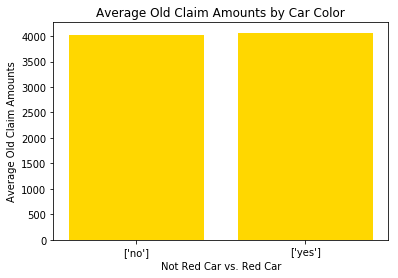

In [229]:
# Average Old Claim Amounts by Car Color
x1 = claim_data.groupby("RED_CAR")["RED_CAR"].unique()
y1 = claim_data.groupby("RED_CAR")["OLDCLAIM"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Old Claim Amounts by Car Color")
plt.xlabel("Not Red Car vs. Red Car")
plt.ylabel("Average Old Claim Amounts")


plt.bar(x_axis, y1, color= 'gold', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Save the figure as png file
plt.savefig("Images/bar_old_red.png")
plt.show()


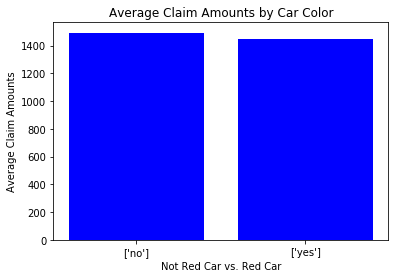

In [230]:
# Average Claim Amounts by Car Color
x1 = claim_data.groupby("RED_CAR")["RED_CAR"].unique()
y1 = claim_data.groupby("RED_CAR")["CLM_AMT"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Amounts by Car Color")
plt.xlabel("Not Red Car vs. Red Car")
plt.ylabel("Average Claim Amounts")


plt.bar(x_axis, y1, color= 'blue', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Save the figure as png file
plt.savefig("Images/bar_avg_red.png")
plt.show()


In [231]:
############


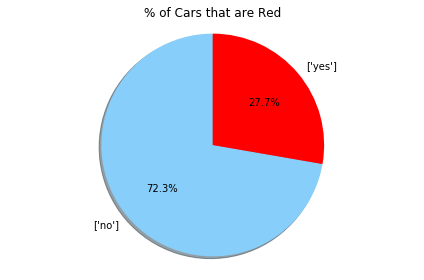

In [232]:
# % of Cars that are Red
cars = claim_data.groupby("RED_CAR")["RED_CAR"].unique()
portion = claim_data.groupby("RED_CAR")["ID"].count()


colors = ["lightskyblue", "red"]
explode = (0, 0)
plt.pie(portion, labels=cars, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Cars that are Red")
plt.axis("equal")
plt.tight_layout()


# Save the figure as png file
plt.savefig("Images/pie_portion_red.png")
plt.show()


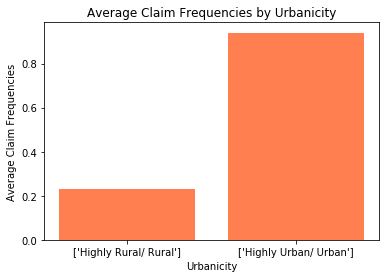

In [233]:
# Average Claim Frequencies by Urbanicity
x1 = claim_data.groupby("URBANICITY")["URBANICITY"].unique()
y1 = claim_data.groupby("URBANICITY")["CLM_FREQ"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Frequencies by Urbanicity")
plt.xlabel("Urbanicity")
plt.ylabel("Average Claim Frequencies")


plt.bar(x_axis, y1, color= 'coral', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Save the figure as png file
plt.savefig("Images/bar_avgfreq_urban.png")
plt.show()


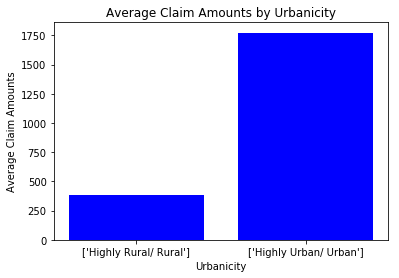

In [234]:
# Average Claim Amounts by Urbanicity
x1 = claim_data.groupby("URBANICITY")["URBANICITY"].unique()
y1 = claim_data.groupby("URBANICITY")["CLM_AMT"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Amounts by Urbanicity")
plt.xlabel("Urbanicity")
plt.ylabel("Average Claim Amounts")


plt.bar(x_axis, y1, color= 'blue', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Save the figure as png file
plt.savefig("Images/bar_avg_urban.png")
plt.show()


In [ ]:
##############

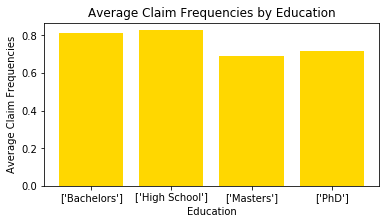

In [66]:
# Average Claim Frequencies by Education
x1 = claim_data.groupby("EDUCATION")["EDUCATION"].unique()
y1 = claim_data.groupby("EDUCATION")["CLM_FREQ"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Frequencies by Education")
plt.xlabel("Education")
plt.ylabel("Average Claim Frequencies")


plt.bar(x_axis, y1, color= 'gold', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 # Set figure width to 6 and height to 3
fig_size[0] = 6
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_avgfreq_edu.png")
plt.show()


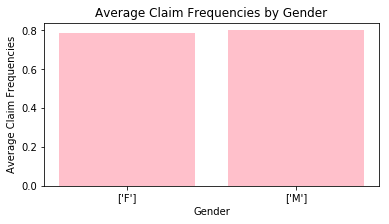

In [68]:
# Average Claim Frequencies by Gender
x1 = claim_data.groupby("GENDER")["GENDER"].unique()
y1 = claim_data.groupby("GENDER")["CLM_FREQ"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Frequencies by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Claim Frequencies")


plt.bar(x_axis, y1, color= 'pink', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"] 
# Set figure width to 6 and height to 3
fig_size[0] = 6
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


# Save the figure as png file
plt.savefig("Images/bar_avgfreq_gender.png")
plt.show()


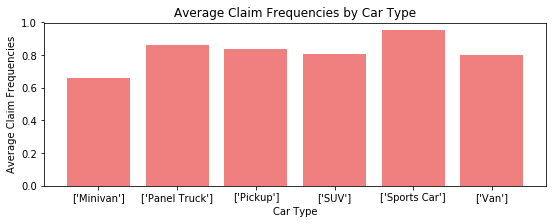

In [37]:
# Average Claim Frequencies by Car Type
x1 = claim_data.groupby("CAR_TYPE")["CAR_TYPE"].unique()
y1 = claim_data.groupby("CAR_TYPE")["CLM_FREQ"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Frequencies by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Average Claim Frequencies")


plt.bar(x_axis, y1, color= 'lightcoral', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Save the figure as png file
plt.savefig("Images/bar_avgfreq_type.png")
plt.show()


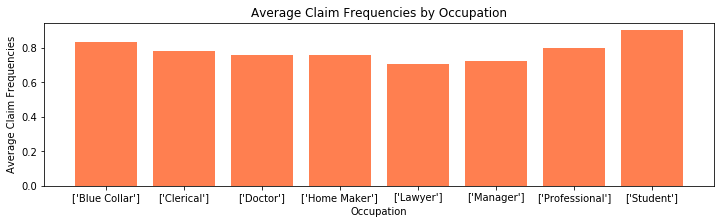

In [50]:
# Average Claim Frequencies by Occupation
x1 = claim_data.groupby("OCCUPATION")["OCCUPATION"].unique()
y1 = claim_data.groupby("OCCUPATION")["CLM_FREQ"].mean()


x_axis = np.arange(0, len(x1))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average Claim Frequencies by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Claim Frequencies")


plt.bar(x_axis, y1, color= 'coral', alpha=1, align="center")
plt.xticks(tick_locations, x1)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 3
fig_size[0] = 12
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size



# Save the figure as png file
plt.savefig("Images/bar_avgfreq_occupation.png")
plt.show()


In [ ]:
#########

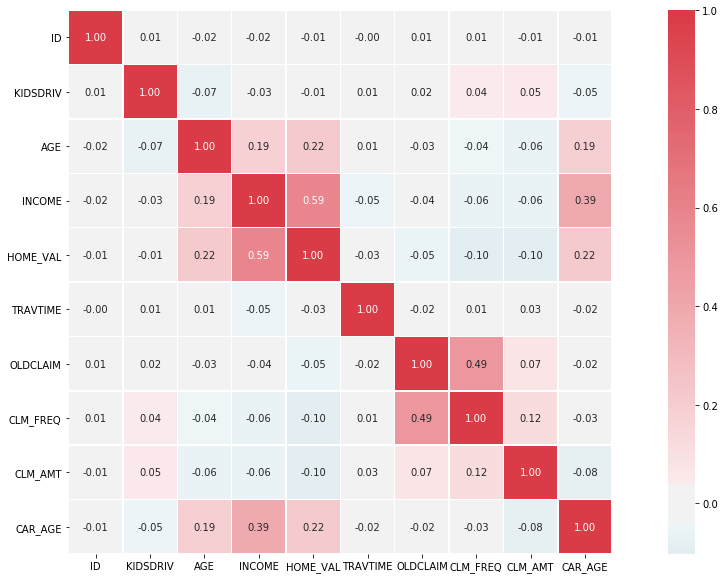

In [13]:
#Correlation between Variables
corr = claim_data.corr()

#correlation map

# Create color map ranging between two colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True )

# Save the figure as png file
#plt.savefig("Images/Correlation.png")

In [17]:
# Create the bins in which Data will be held
# Bins are separated by age
#bins = [0, 18, 29, 39, 49, 59, 69, 79, 100]

# Create the names for the four bins
#group_names = ["<18", "18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-100" ]

# Create the bins in which Data will be held
# Bins are separated by age
bins = [0, 30000, 59999, 89999, 119999, 400000]

# Create the names for the four bins
group_names = ["<$30,000", "$30,000-$59,999", "$60,000-$89,999", "$90,000-$119,999", "$120,000-$400,000"]

In [18]:
max(claim_data["INCOME"])

367030

In [19]:
claim_data['Income Group'] = pd.cut(claim_data['INCOME'], bins, labels=group_names)
claim_data.head()

,ID,KIDSDRIV,AGE,INCOME,HOME_VAL,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE,URBANICITY,Income Group
0,63581743,0,60,67349,0,M,PhD,Professional,14,Private,Minivan,yes,4461,2,0,18,Highly Urban/ Urban,"$60,000-$89,999"
1,132761049,0,43,91449,257252,M,High School,Blue Collar,22,Commercial,Minivan,yes,0,0,0,1,Highly Urban/ Urban,"$90,000-$119,999"
2,921317019,0,48,52881,0,M,Bachelors,Manager,26,Private,Van,yes,0,0,0,10,Highly Urban/ Urban,"$30,000-$59,999"
3,727598473,0,35,16039,124191,F,High School,Clerical,5,Private,SUV,no,38690,2,0,10,Highly Urban/ Urban,"<$30,000"
6,871024631,0,34,125301,0,F,Bachelors,Blue Collar,46,Commercial,Sports Car,no,0,0,2946,7,Highly Urban/ Urban,"$120,000-$400,000"


In [20]:
income_grouped = claim_data.groupby('Income Group')
total_count_income = pd.DataFrame(income_grouped["ID"].nunique()).rename(columns={'ID':'Total Count'}).reset_index()
total_count_income

,Income Group,Total Count
0,"<$30,000",1387
1,"$30,000-$59,999",2078
2,"$60,000-$89,999",1496
3,"$90,000-$119,999",844
4,"$120,000-$400,000",610


In [21]:
income = total_count_income["Total Count"]
income

0    1387
1    2078
2    1496
3     844
4     610
Name: Total Count, dtype: int64

In [22]:
labels = total_count_income["Income Group"]
labels

0             <$30,000
1      $30,000-$59,999
2      $60,000-$89,999
3     $90,000-$119,999
4    $120,000-$400,000
Name: Income Group, dtype: category
Categories (5, object): [<$30,000 < $30,000-$59,999 < $60,000-$89,999 < $90,000-$119,999 < $120,000-$400,000]

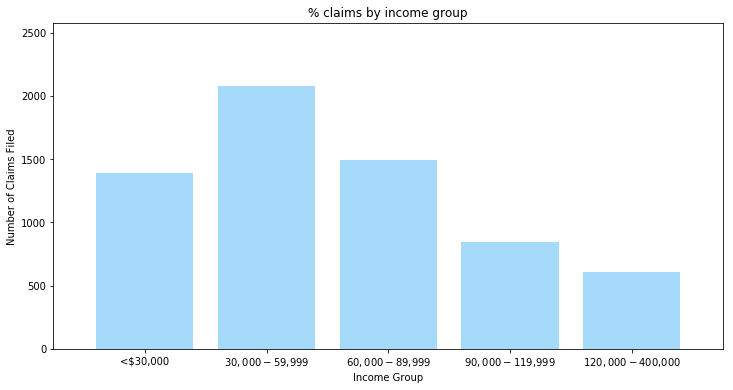

In [31]:
x_axis = np.arange(0, len(labels))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("% claims by income group")
plt.xlabel("Income Group")
plt.ylabel("Number of Claims Filed")

plt.xlim(-0.75, len(labels)-.25)
plt.ylim(0, max(income) + 500)

plt.bar(x_axis, income, facecolor="lightskyblue", alpha=0.75, align="center")
plt.xticks(tick_locations, labels)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

plt.savefig("Images/income_group.png")
plt.show()